In [1]:
from tools._counttools import gen_necklace
from tools._graphtools import generate_rgc, generate_ft, rgc_coords, pl_graph, left_state, right_state,tree_mag, graph_from_fluxed,rgc_mat, convert_to_phase, shift_graph
from tools._vectools import J_n, B_l, neck_permute, permute_bipartite_adjacency,pad

import numpy as np
import random
import matplotlib.pyplot as plt

np.set_printoptions(precision=2,suppress=True,linewidth = np.inf)


In [2]:
X = [2]*2
d = len(X)
N = np.prod(X)
seed = 3
necklace = gen_necklace(N, random.seed(seed))

necklace2 = gen_necklace(N, random.seed(seed+1))

In [3]:
rgc = generate_rgc(generate_ft(X), necklace)
rgc.construct_adj()
rgc.construct_fluxed()

In [4]:
rgc2 = generate_rgc(generate_ft(X), necklace2)
rgc2.construct_adj()
rgc2.construct_fluxed()

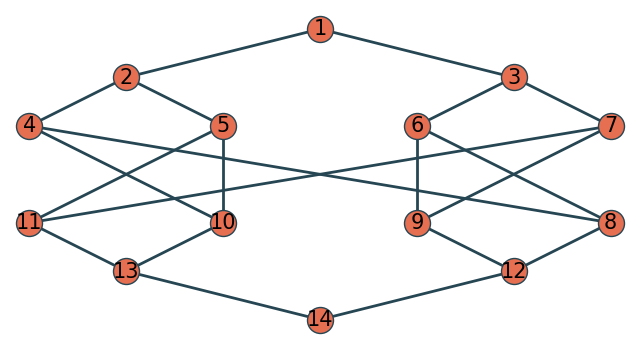

In [5]:
fig, axes = plt.subplots(1, 1, figsize=(8, 8))  # adjust figsize as needed
pl_graph(axes, rgc, positions=rgc_coords(X,xd=3,yd=1,spacing=1), vertex_size=350,outline_weight = 1, edge_weight=2,margin=.2,labels=True)
plt.show()

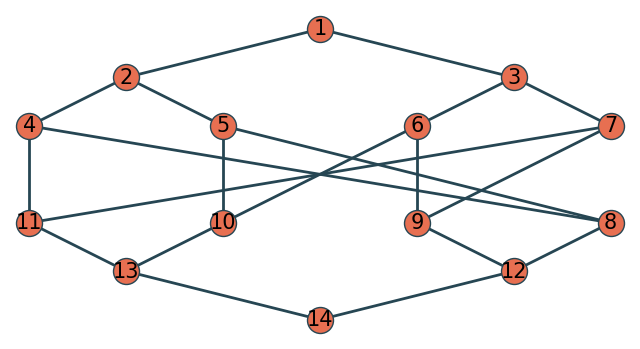

In [6]:
fig, axes = plt.subplots(1, 1, figsize=(8, 8))  # adjust figsize as needed
pl_graph(axes, rgc2, positions=rgc_coords(X,xd=3,yd=1,spacing=1), vertex_size=350,outline_weight = 1, edge_weight=2,margin=.2,labels=True)
plt.show()

In [7]:
def vec_plot(vec):
    labels = np.arange(1,len(vec)+1)

    plt.bar(labels,vec)
    plt.xlabel("Site")
    plt.show()

In [8]:
fluxes = np.linspace(0,8*np.pi,300)
mat_elem = []
mat_elem2 = []
for flux in fluxes:
    mat_elem.append(np.abs( left_state(rgc,flux).conj().T @ rgc.weighted_adj(flux) @ right_state(rgc,flux))**2)
    mat_elem2.append(np.abs( left_state(rgc2,flux).conj().T @ rgc2.weighted_adj(flux) @ right_state(rgc2,flux))**2)

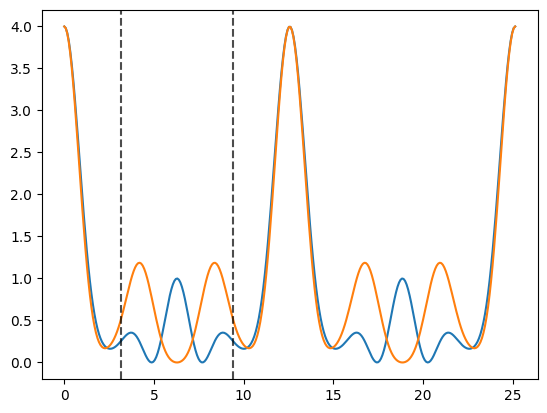

In [9]:
plt.plot(fluxes,mat_elem)
plt.plot(fluxes,mat_elem2)

plt.axvline(3*np.pi,color="black",alpha=.7,linestyle="--")
plt.axvline(np.pi,color="black",alpha=.7,linestyle="--")


In [10]:
def left_state_analytic(flux, L):
    state = np.zeros(L,dtype=complex)

    for l in range(L):
        state[l] = 1/np.sqrt(L) * np.exp(1j* (flux/4*(1-L) + flux/2*l))
        #state[l] = 1/np.sqrt(L) * np.exp(1j* (flux/4 * l))

    return state


In [11]:
X = [2]*2
d = len(X)
L = np.prod(X)
seed = 3
necklace = gen_necklace(L, random.seed(seed))

rgc = generate_rgc(generate_ft(X), necklace)
rgc.construct_adj()
rgc.construct_fluxed()

In [12]:
rgc = generate_rgc(generate_ft(X), necklace)
rgc.construct_adj()
rgc.construct_fluxed()

#flux = 1.79516
flux = .2


state =np.array( [x for x in left_state(rgc,flux) if x != 0] )
print("Andrew: ", state)
print("Angles: ",np.angle(state))
print("Spacing: ", np.angle(state)[0] - np.angle(state)[1])
print("Offset: ", np.angle(state)[0])


analytic_state=left_state_analytic(flux, L)
print("Analytic Attempt: ", analytic_state)
print("Angles: ",np.angle(analytic_state))
print("Spacing: ", np.angle(analytic_state)[0] - np.angle(analytic_state)[1])
print("Offset: ", np.angle(analytic_state)[0])

Andrew:  [0.49-0.07j 0.5 -0.02j 0.5 +0.02j 0.49+0.07j]
Angles:  [-0.15 -0.05  0.05  0.15]
Spacing:  -0.1
Offset:  -0.15000000000000002
Analytic Attempt:  [0.49-0.07j 0.5 -0.02j 0.5 +0.02j 0.49+0.07j]
Angles:  [-0.15 -0.05  0.05  0.15]
Spacing:  -0.1
Offset:  -0.15000000000000002


# Checking the Action of Glue Graph

In [89]:
from tools._vectools import permute_bipartite_adjacency, e_n

def slowdown(phi, B):
    leaves = int(np.shape(B)[0])
    total = 0
    for i in range(0,leaves):
        for j in range(0,leaves):
            total += np.exp((-1j*phi*(i+j)/2)) * (B)[i,j]

    return total/leaves * np.exp(1j *phi/2 * (leaves-1))

def formula_check(phi, leaves):
    ### For default cycle
    total = sum (np.exp(1j*phi* ((-l%leaves)- l )/2) + np.exp(1j*phi* ( (leaves-1-l)%leaves -l ) /2) for l in range(leaves))
    return total/leaves 

Text(0.5, 1.0, 'Default Necklace')

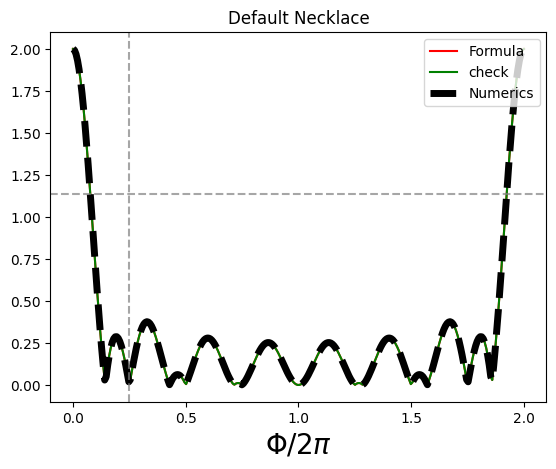

In [90]:
X = [2]*3
d = len(X)
L = np.prod(X)
necklace = [x for x in range(1, 2*L+1)]
rgc3 = generate_rgc(generate_ft(X), necklace)
rgc3.construct_adj()
rgc3.construct_fluxed()

fluxes = np.linspace(0,4*np.pi,300)
mat_elem = []
mat_elem2 = []
for flux in fluxes:
    mat_elem.append(np.abs(left_state(rgc3,flux).conj().T @ rgc3.weighted_adj(0) @ right_state(rgc3,flux)))

fs=20
plt.xticks(
        np.linspace(0, 4*np.pi, 5),
        np.linspace(0,       2, 5))
plt.xlabel(r"$\Phi/2 \pi$",fontsize=fs)

plt.plot(fluxes, np.abs(slowdown(fluxes, B_l(L))) ,color="red",label="Formula")

plt.plot(fluxes, np.abs(formula_check(fluxes, L)) ,color="green",label="check")

plt.plot(fluxes,mat_elem,color="black",alpha = 1, linestyle="--", lw=5,label="Numerics")

plt.legend(fontsize=10, loc="upper right")

plt.axhline(1.138,color="grey",alpha=.7,linestyle="--")
plt.axvline(np.pi/2,color="grey",alpha=.7,linestyle="--")

plt.title("Default Necklace")

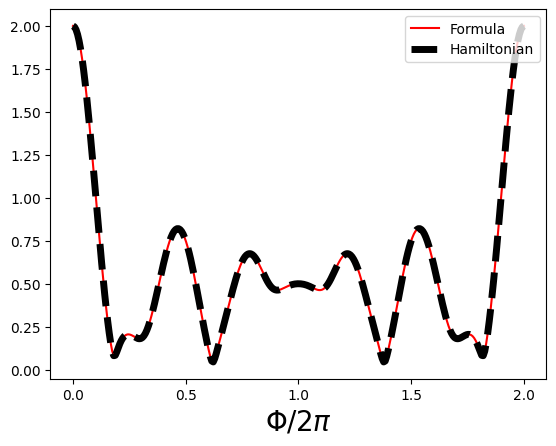

In [93]:
X = [2]*3
d = len(X)
L = np.prod(X)
#necklace = [x for x in range(1, 2*L+1)]
necklace = gen_necklace(L) # [x for x in range(1, 2*L+1)]
o,e = neck_permute(necklace)

bip =permute_bipartite_adjacency(B_l(L), o,e)[0:L,L:2*L]

rgc3 = graph_from_fluxed(rgc_mat(X,necklace))
rgc3.construct_adj()
rgc3.construct_fluxed()

fluxes = np.linspace(0,4*np.pi,300)
mat_elem = []
mat_elem2 = []
for flux in fluxes:
    mat_elem.append(np.abs(left_state(rgc3,flux).conj().T @ rgc3.weighted_adj(0) @ right_state(rgc3,flux)))
fs=20
plt.xticks(
        np.linspace(0, 4*np.pi, 5),
        np.linspace(0,       2, 5))
plt.xlabel(r"$\Phi/2 \pi$",fontsize=fs)

plt.plot(fluxes, np.abs(slowdown(fluxes,bip)) ,color="red",label="Formula")
plt.plot(fluxes,mat_elem,color="black",alpha = 1, linestyle="--", lw=5,label="Hamiltonian")

plt.legend(fontsize=10, loc="upper right")



In [95]:
np.linalg.det(bip)

np.float64(0.0)

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def plot_matrix_heatmap(matrix):
    """
    Plots a 2D matrix as a heatmap where each entry is represented by a single pixel,
    using a blue-white-red colormap so that -1 is blue, 0 is white, and 1 is red.
    
    Parameters:
    matrix : array-like, shape (M, N)
        The input 2D matrix with values -1, 0, or 1.
    """
    matrix = np.array(matrix)
    plt.figure()
    plt.imshow(matrix, cmap='bwr', vmin=-1, vmax=1, interpolation='nearest', aspect='equal')
    plt.colorbar(ticks=[-1, 0, 1])
    plt.show()


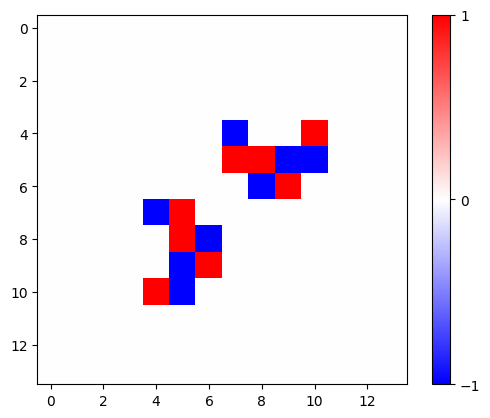

In [21]:
mat2 = rgc3.adj - np.real(convert_to_phase(rgc_mat(X,necklace),0))
plot_matrix_heatmap(mat2)


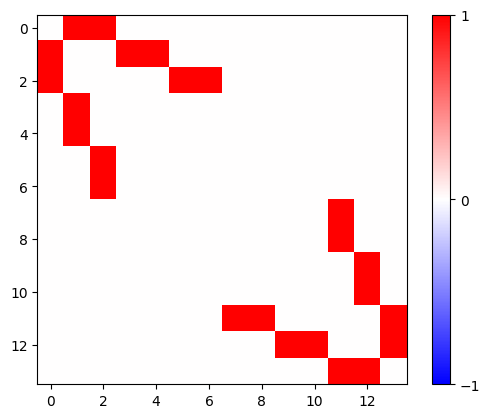

In [24]:
mat3 = np.real(convert_to_phase(rgc_mat(X,necklace),0))-pad(C, int((tree_mag(X) - L))) 
plot_matrix_heatmap(mat3)

In [47]:
rgc3.adj[tree_mag(X)-L:tree_mag(X),tree_mag(X):tree_mag(X)+L]

array([[0., 1., 1., 0.],
       [1., 0., 0., 1.],
       [1., 0., 1., 0.],
       [0., 1., 0., 1.]])

In [48]:
bip

array([[0., 1., 1., 0.],
       [1., 0., 0., 1.],
       [0., 1., 0., 1.],
       [1., 0., 1., 0.]])

In [ ]:
enumerate